<a href="https://colab.research.google.com/github/iciromaco/Semi3A/blob/master/L8/ORB%E5%B1%80%E6%89%80%E7%89%B9%E5%BE%B4%E3%81%AE%E3%83%9E%E3%83%83%E3%83%81%E3%83%B3%E3%82%AF%E3%82%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [ORB局所特徴](http://lang.sist.chukyo-u.ac.jp/classes/OpenCV/py_tutorials/py_feature2d/py_orb/py_orb.html)をもちいた画像のマッチング

【参考】[特徴点のマッチング](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_feature2d/py_matcher/py_matcher.html)

ORB特徴は，特許問題のあるSIFT,SURF局所特徴に代わる局所特徴量です．詳細については自分で調べてください．

## プログラム実行にあたっての注意

- 下のプログラムは，２枚の画像のマッチングを行い，類似性の高い特徴点同士を見出して線で結ぶというます．
- マッチング対象となる画像を自分で用意し， **pict01.jpg**，**pict02.jpg**とリネームするか，プログラム中のファイル名を用意した画像のファイル名に応じて修正するか，どちらかを行ってください． 
- 処理対象画像はプログラム（このファイル）と同じフォルダに入れておく必要があります．

## Google Colaboratory で実行する場合の注意
- <font color="red">Google Colaboratory</font>を使う場合は，
　左のエリア（エリアが表示されていない場合は”＞”をクリック）の「ファイル」メニューをクリックし，「アップロード」でアップロードしてください．
  「ファイル」メニューは２つあります．∞マークのすぐ横のファイルメニューではありませんので注意してください．
- 同じファイル名の画像をアップロードしても上書きされませんので注意してください．既存のファイルと同じ名前のファイルをアップロードした場合，ファイル名が変わります．


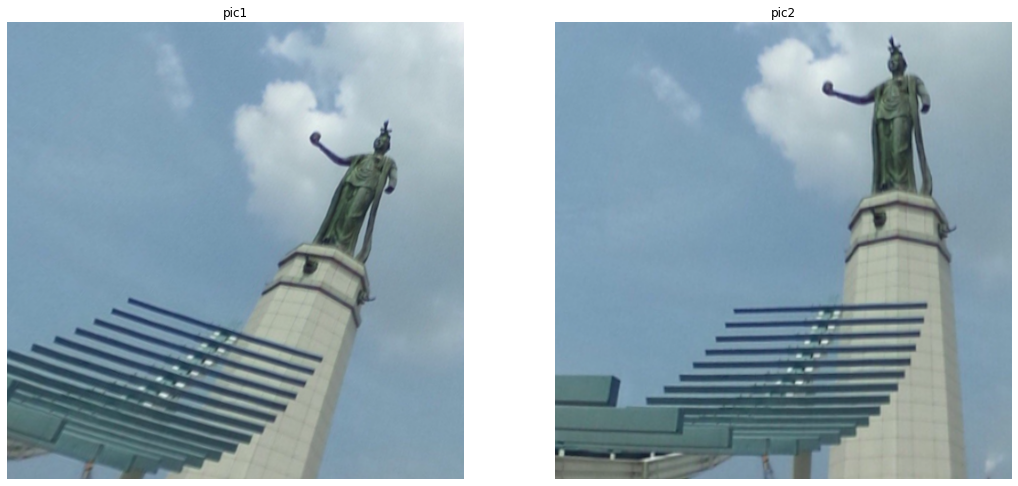

                                                                       図１　入力画像


In [0]:
import numpy as np
import cv2
import PIL.Image as PILImage
import urllib.request
from IPython.display import Image,display
import matplotlib.pyplot as plt

def show_img(img):
    encoded = cv2.imencode(".png", img)[1].tobytes()
    display(Image(encoded))

url = "https://user-images.githubusercontent.com/24559785/84000635-fbf12300-a99f-11ea-929c-80f39b3a2fac.jpg"
pic1,header=urllib.request.urlretrieve(url)
url = "https://user-images.githubusercontent.com/24559785/84000550-d401bf80-a99f-11ea-9d43-bde2454210c1.jpg"
pic2,header=urllib.request.urlretrieve(url)
url = "https://user-images.githubusercontent.com/24559785/84000554-d6fcb000-a99f-11ea-8c53-840f3a09901c.jpg"
pic3,header=urllib.request.urlretrieve(url)

col1 = cv2.imread(pic1,1) # pic1 を読み込み
col2 = cv2.imread(pic2,1) # pic2 を読み込み
col3 = cv2.imread(pic3,1) # pic2 を読み込み

plt.figure(figsize=(18, 10))
plt.subplot(1,2,1)
plt.imshow(col1[:,:,::-1])
plt.title("pic1",loc='center')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(col2[:,:,::-1])
plt.title("pic2",loc='center')
plt.axis('off')
plt.show()
print(' '*70,'図１　入力画像')

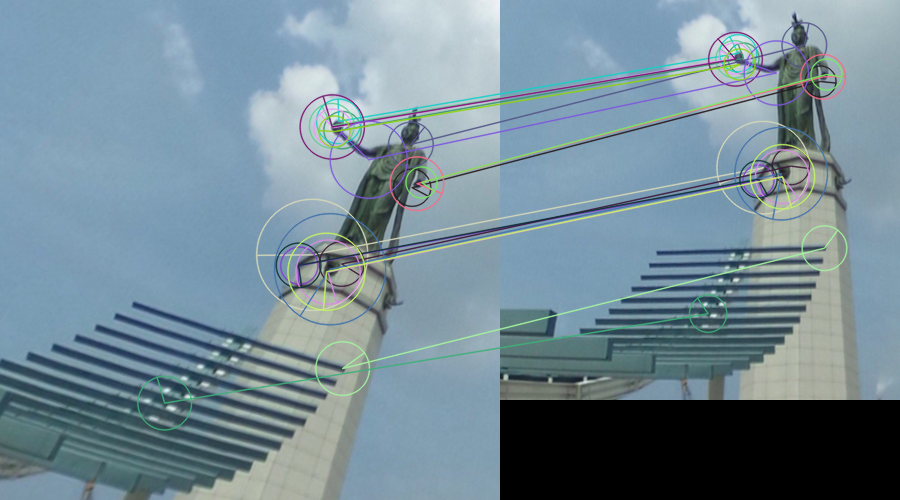

                                                             図２照合結果(画像１-画像２)


In [0]:
# out = np.zeros((img2.shape[0],img1.shape[1]+img2.shape[1],3),np.uint8)
# ORB 特徴検出器を生成
orb = cv2.ORB_create()

# ORB特徴のキーポイントと記述を生成
kp1, des1 = orb.detectAndCompute(col1,None)
kp2, des2 = orb.detectAndCompute(col2,None)

# 総当り照合器(BFMatcher)を、評価尺度＝ハミング距離、クロスチェックあり＝ desc2 からみても最適な対応であることをチェック　に設定
# （注意）ハミング距離はバイナリ型の特徴検出器でないと指定してはいけません
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# 各特徴にマッチする記述を得る
matches12 = bf.match(des1,des2)
 
# 照合対を距離の小さいもの順に並べ替える
matches12 = sorted(matches12, key = lambda x:x.distance)
 
# 上位20ペアまでを描画.
#out = cv2.drawMatches(img1,kp1,img2,kp2,matches[:20],None,flags=0) # デフォルト
#out2 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:20],None,flags=2) # 孤立点を描かない
#out4 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:20],None,flags=4) # 特徴サイズに応じた円を描く
out6 = cv2.drawMatches(col1,kp1,col2,kp2,matches12[:20],None,flags=6) # 上２つの組わせ
show_img(out6)
print(' '*60,"図２照合結果(画像１-画像２)")

# 追加実験

同じ被写体が写っている第３の画像を用意して，画像１と画像３，画像２と画像３についても照合実験を行う．

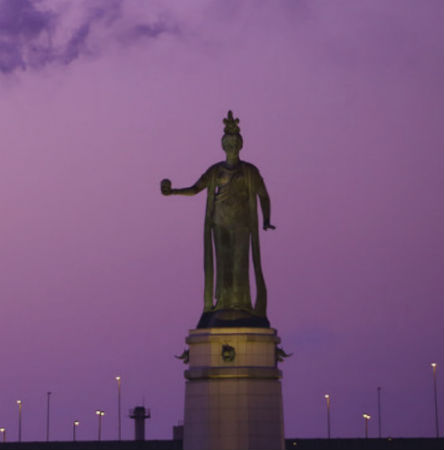

           図３　入力画像３(pic3.jpg)


In [0]:
show_img(col3)
print(' '*10,"図３　入力画像３(pic3.jpg)")

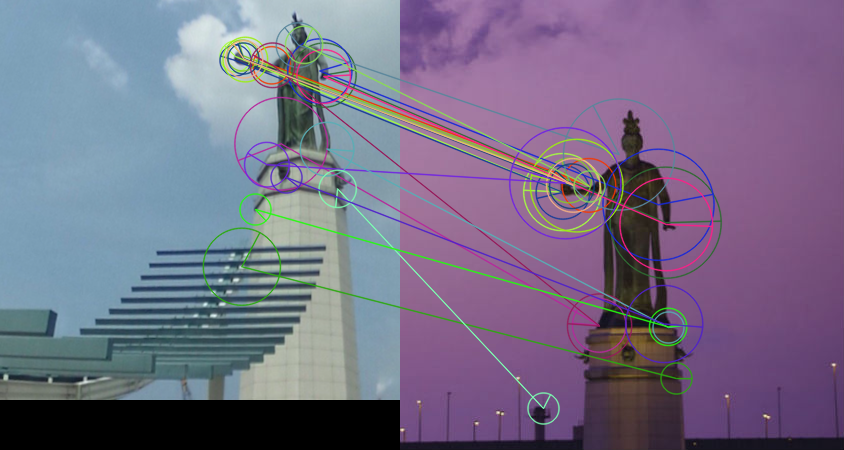

                                                   図５　照合結果(画像２-画像３)


In [0]:
# ORB特徴のキーポイントと記述を生成
kp3, des3 = orb.detectAndCompute(col3,None)
# 総当り照合器を、評価尺度＝ハミング距離、クロスチェックあり＝ desc2 からみても最適な対応であることをチェック
# （注意）ハミング距離はバイナリ型の特徴検出器でないと指定してはいけません
bf2 = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
bf3 = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# 各特徴にマッチする記述を得る
matches23 = bf2.match(des2,des3)
matches31 = bf3.match(des3,des1)
 
# 照合対を距離の小さいもの順に並べ替える
matches23 = sorted(matches23, key = lambda x:x.distance)
matches31 = sorted(matches31, key = lambda x:x.distance)

# 上位20ペアまでを描画.
out7 = cv2.drawMatches(col2,kp2,col3,kp3,matches23[:20],None,flags=6) # 
show_img(out7)
print(' '*50,"図５　照合結果(画像２-画像３)")

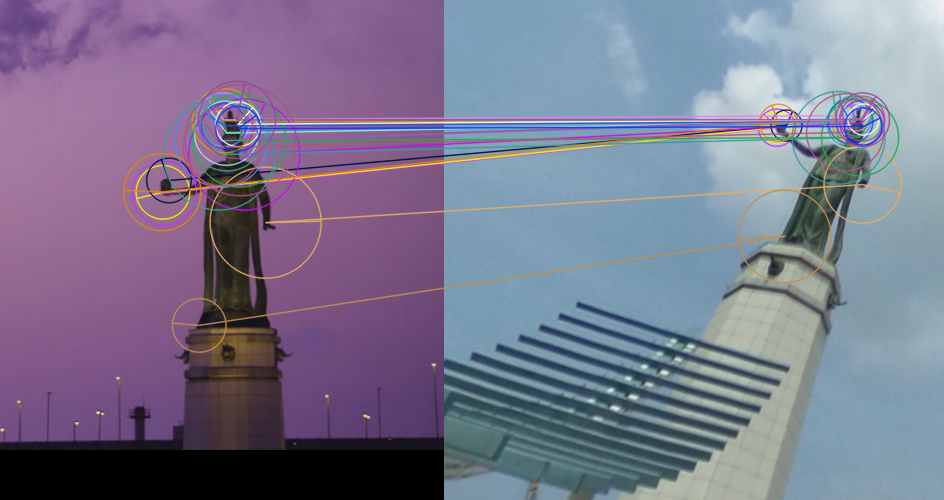

                                                   図４　照合結果(画像３-画像１)


In [0]:
# 上位20ペアまでを描画.
out8 = cv2.drawMatches(col3,kp3,col1,kp1,matches31[:20],None,flags=6) # 
show_img(out8)
print(' '*50,"図４　照合結果(画像３-画像１)")